<a href="https://colab.research.google.com/github/Asuskf/helpingPeople/blob/master/Sklearn_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Ejercicio 1A



In [1]:
pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.6/dist-packages (0.22.2.post1)


In [0]:
import sklearn as skl
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from tabulate import tabulate

In [3]:
data = pd.read_csv('ionosphere_data.txt',header=None,names=['x'+str(i) for i in range(35)],index_col=False)
data = data.rename(columns={'x34':'y'})
data

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,y
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,0.34432,-0.69707,-0.51685,-0.97515,0.05499,-0.62237,0.33109,-1.00000,-0.13151,-0.45300,-0.18056,-0.35734,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,0.85443,0.00827,0.54591,0.00299,0.83775,-0.13644,0.75535,-0.08540,0.70887,-0.27502,0.43385,-0.12062,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,0.14516,0.54094,-0.39330,-1.00000,-0.54467,-0.69975,1.00000,0.00000,0.00000,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,0.56409,-0.00712,0.34395,-0.27457,0.52940,-0.21780,0.45107,-0.17813,0.05982,-0.35575,0.02309,-0.52879,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,0.89391,0.13130,0.81197,0.06723,0.79307,-0.08929,1.00000,-0.02101,0.96639,0.06618,0.87605,0.01155,0.77521,0.06618,0.95378,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,g
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,0.96510,0.03281,0.94171,0.07330,0.94625,-0.01326,0.97173,0.00140,0.94834,0.06038,0.92670,0.08412,0.93124,0.10087,0.94520,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,g
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,0.94124,0.01766,0.92595,0.04688,0.93954,-0.01461,0.94837,0.02004,0.93784,0.01393,0.91406,0.07677,0.89470,0.06148,0.93988,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,g
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,0.89724,-0.03315,0.89061,-0.01436,0.90608,-0.04530,0.91381,-0.00884,0.80773,-0.12928,0.88729,0.01215,0.92155,-0.02320,0.91050,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,g


In [0]:
y_dict = {
    'g':1,
    'b':0,
}
data.y = data.y.map(y_dict)

In [5]:
data

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,y
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,1
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,0.34432,-0.69707,-0.51685,-0.97515,0.05499,-0.62237,0.33109,-1.00000,-0.13151,-0.45300,-0.18056,-0.35734,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,0
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,0.85443,0.00827,0.54591,0.00299,0.83775,-0.13644,0.75535,-0.08540,0.70887,-0.27502,0.43385,-0.12062,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,1
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,0.14516,0.54094,-0.39330,-1.00000,-0.54467,-0.69975,1.00000,0.00000,0.00000,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,0
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,0.56409,-0.00712,0.34395,-0.27457,0.52940,-0.21780,0.45107,-0.17813,0.05982,-0.35575,0.02309,-0.52879,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,0.89391,0.13130,0.81197,0.06723,0.79307,-0.08929,1.00000,-0.02101,0.96639,0.06618,0.87605,0.01155,0.77521,0.06618,0.95378,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,1
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,0.96510,0.03281,0.94171,0.07330,0.94625,-0.01326,0.97173,0.00140,0.94834,0.06038,0.92670,0.08412,0.93124,0.10087,0.94520,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,1
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,0.94124,0.01766,0.92595,0.04688,0.93954,-0.01461,0.94837,0.02004,0.93784,0.01393,0.91406,0.07677,0.89470,0.06148,0.93988,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,1
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,0.89724,-0.03315,0.89061,-0.01436,0.90608,-0.04530,0.91381,-0.00884,0.80773,-0.12928,0.88729,0.01215,0.92155,-0.02320,0.91050,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,1


In [0]:
#Matriz de covariancia
X = data.drop(columns='y')
matrix = X.shape[0]
matrixCov = X.T / (matrix-1) @ (np.eye(matrix) - np.ones((matrix,matrix))/ matrix) @ X


In [0]:
autoValues, autoVectors = np.linalg.eigh(matrixCov)

In [8]:
autoValues

array([-1.35506278e-16,  2.13486607e-02,  3.12110365e-02,  3.77421966e-02,
        3.97823081e-02,  4.50626525e-02,  4.81501783e-02,  5.34065104e-02,
        5.76068323e-02,  6.45480470e-02,  6.69998090e-02,  7.22500498e-02,
        8.80884962e-02,  9.34254343e-02,  1.00963482e-01,  1.04944254e-01,
        1.09807260e-01,  1.18836203e-01,  1.29465040e-01,  1.33887709e-01,
        1.52469571e-01,  1.61470084e-01,  1.70370415e-01,  1.91176319e-01,
        2.08866995e-01,  2.50421574e-01,  2.66321530e-01,  2.78160116e-01,
        3.40645323e-01,  4.51673031e-01,  6.42795831e-01,  6.92663414e-01,
        1.13708673e+00,  2.90436153e+00])

In [9]:
autoVectors

array([[-2.24368220e-15,  2.17392760e-01, -3.35914031e-01, ...,
         8.18325850e-02, -6.35552532e-03, -2.32583895e-02],
       [ 1.00000000e+00,  1.30451205e-15, -1.94289029e-15, ...,
        -1.11022302e-16,  1.38777878e-17, -2.22044605e-16],
       [ 1.66367566e-15, -1.66416026e-01, -1.66305427e-02, ...,
         3.04940544e-01, -7.76738311e-02, -1.01384555e-01],
       ...,
       [-4.78888631e-16,  1.52133917e-01,  7.65674729e-02, ...,
         1.38997322e-01, -1.73524003e-01, -2.00918698e-02],
       [ 8.48336913e-16, -1.51731885e-01,  2.55787363e-01, ...,
         2.16588759e-01,  1.44131421e-01, -2.00176170e-01],
       [ 1.40512602e-16, -2.25169232e-01,  7.10297270e-02, ...,
         1.83851806e-01, -1.44981021e-01,  1.74758584e-02]])

In [10]:
sum(autoValues)

9.266008628423002

In [11]:
matrixTrace = np.trace(matrixCov)
matrixTrace

9.266008628423002

In [12]:
propVariability = autoValues / matrixTrace
propVariability

array([-1.46240182e-17,  2.30397592e-03,  3.36833665e-03,  4.07318815e-03,
        4.29335970e-03,  4.86322151e-03,  5.19643141e-03,  5.76370177e-03,
        6.21700612e-03,  6.96611126e-03,  7.23070868e-03,  7.79732167e-03,
        9.50662790e-03,  1.00825974e-02,  1.08961135e-02,  1.13257238e-02,
        1.18505458e-02,  1.28249614e-02,  1.39720397e-02,  1.44493400e-02,
        1.64547193e-02,  1.74260667e-02,  1.83866023e-02,  2.06320031e-02,
        2.25412044e-02,  2.70258301e-02,  2.87417744e-02,  3.00194104e-02,
        3.67628972e-02,  4.87451555e-02,  6.93713827e-02,  7.47531588e-02,
        1.22715916e-01,  3.13442567e-01])

In [13]:
porcent = propVariability * 100
porcent

array([-1.46240182e-15,  2.30397592e-01,  3.36833665e-01,  4.07318815e-01,
        4.29335970e-01,  4.86322151e-01,  5.19643141e-01,  5.76370177e-01,
        6.21700612e-01,  6.96611126e-01,  7.23070868e-01,  7.79732167e-01,
        9.50662790e-01,  1.00825974e+00,  1.08961135e+00,  1.13257238e+00,
        1.18505458e+00,  1.28249614e+00,  1.39720397e+00,  1.44493400e+00,
        1.64547193e+00,  1.74260667e+00,  1.83866023e+00,  2.06320031e+00,
        2.25412044e+00,  2.70258301e+00,  2.87417744e+00,  3.00194104e+00,
        3.67628972e+00,  4.87451555e+00,  6.93713827e+00,  7.47531588e+00,
        1.22715916e+01,  3.13442567e+01])

In [0]:
y = sorted(porcent, reverse=True)

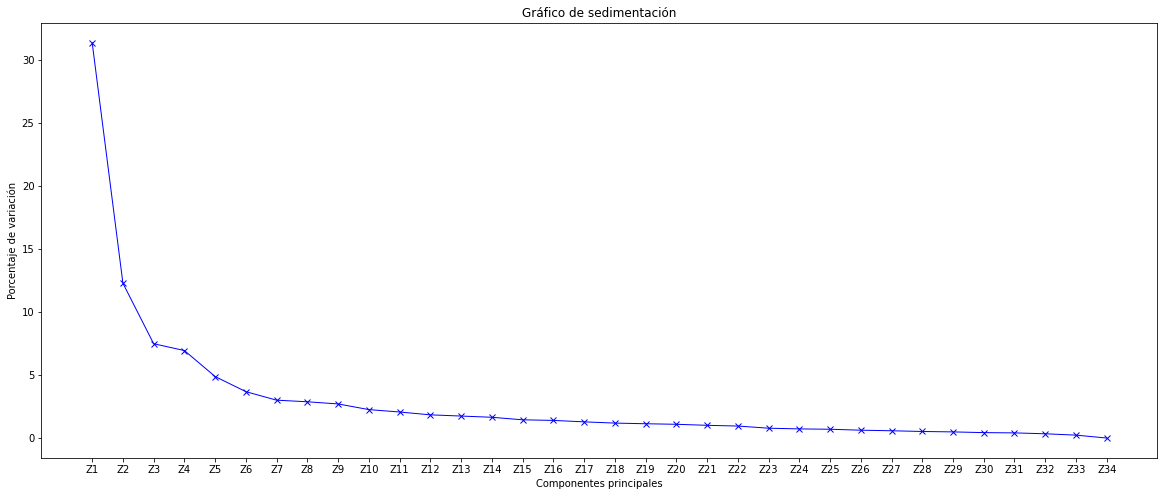

In [15]:
plt.figure(figsize=(20,8))
plt.plot(['Z'+str(i+1) for i in range(len(porcent))], y , color='blue', marker='x', linewidth=1, markersize=6)
plt.title('Gráfico de sedimentación')
plt.xlabel('Componentes principales')
plt.ylabel('Porcentaje de variación')
plt.show()

In [0]:
retainedValues = autoValues[[32, 33]]

In [0]:
retainedAutoVect = autoVectors[:,[32,33]]

In [69]:
allVectors = autoVectors[0,0]
l1 = autoValues[0]
matrix11 = matrixCov['x0'][0]
rx1y1 = (allVectors * np.sqrt(abs(l1))) / np.sqrt(abs(matrix11))
rx1y1

-8.393916878617198e-23

In [19]:
#Ejercicio 1 a
sum(y[0:24])
#se necesita 25 componentes principales

95.69546675004791

##Ejercicio 1B


In [0]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
fitLabel = le.fit(y)
classes = le.classes_
transform = le.transform(classes[0:17])
resultIT = le.inverse_transform(transform)

In [77]:
#Ejercio 1 b
print(np.power(np.mean(resultIT), 2) - np.power(np.mean(y), 2))
print(rx1y1)
#No tienen relación

-8.218522360061465
-8.393916878617198e-23


##Ejercicio 1C


In [0]:
originalData = y[:2]
transformData = sorted(resultIT, reverse=True)[:2]

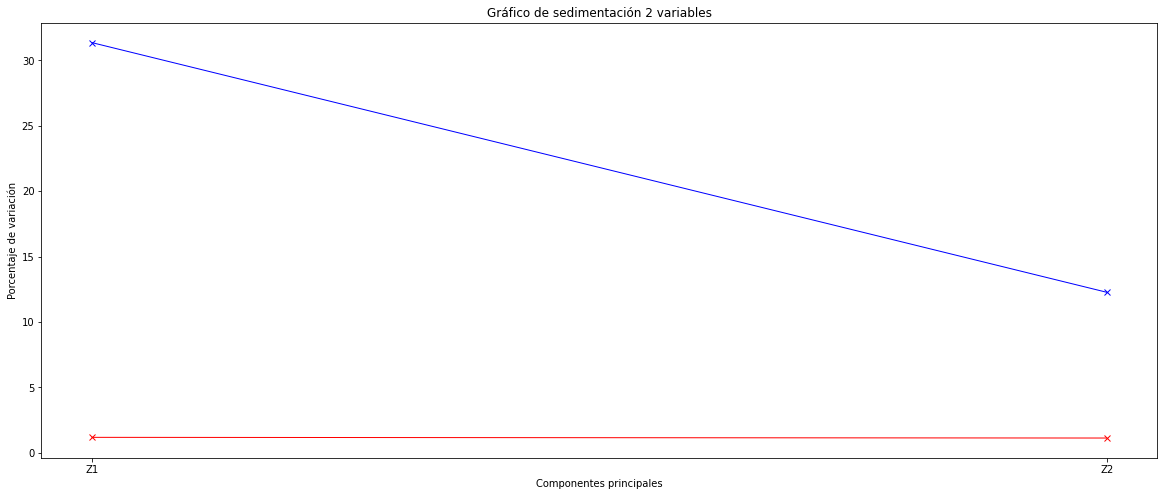

In [94]:
plt.figure(figsize=(20,8))
plt.plot(['Z'+str(i+1) for i in range(len(originalData))], originalData , color='blue', marker='x', linewidth=1, markersize=6)
plt.plot(['Z'+str(i+1) for i in range(len(originalData))], transformData , color='red', marker='x', linewidth=1, markersize=6)
plt.title('Gráfico de sedimentación 2 variables')
plt.xlabel('Componentes principales')
plt.ylabel('Porcentaje de variación')
plt.show()

##Ejercicio 2


In [0]:
from sklearn.manifold import MDS

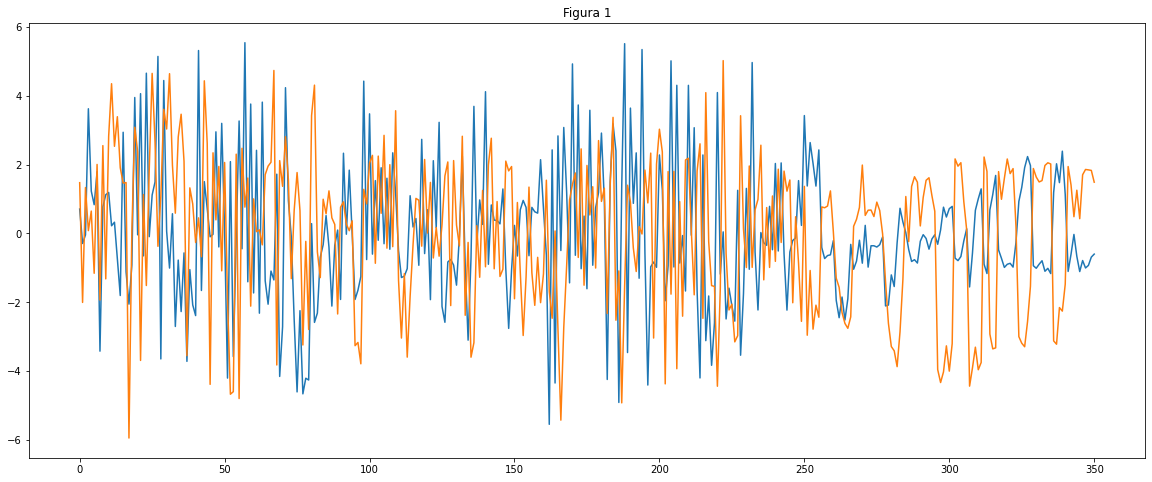

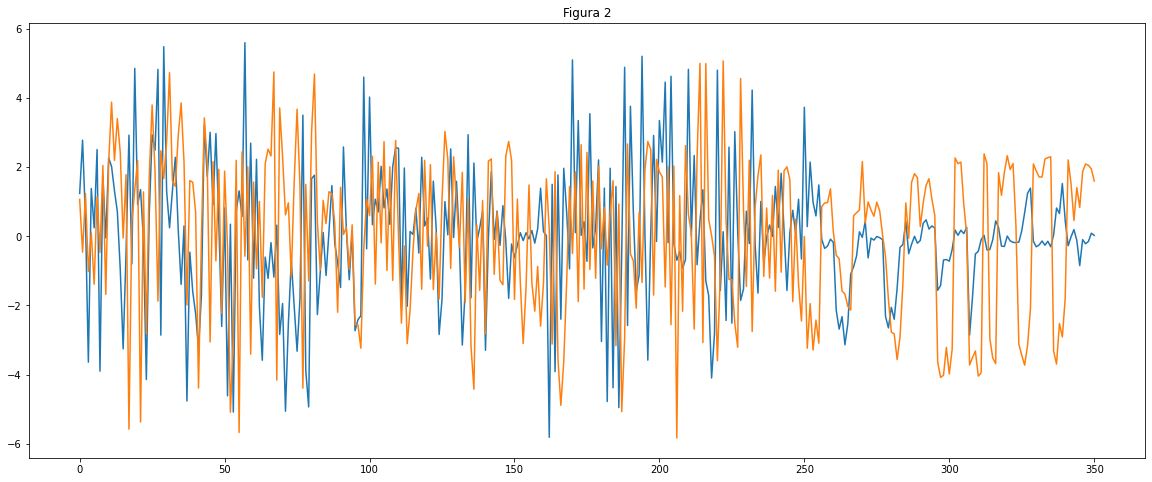

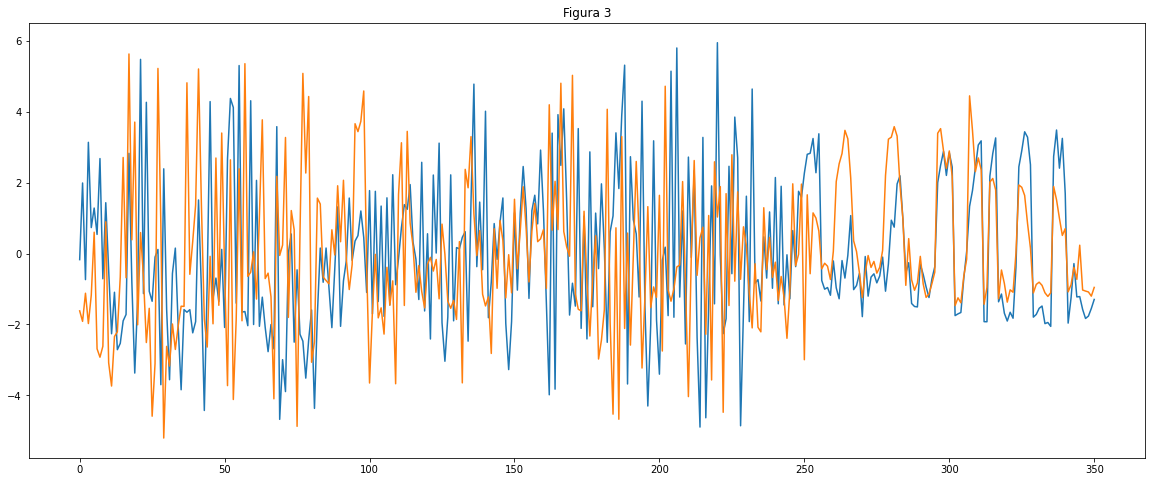

In [125]:
for i in range(3):
  embedding = MDS(n_components=2)
  X_transformed = embedding.fit_transform(data)
  plt.figure(figsize=(20,8))
  plt.plot(X_transformed)
  plt.title('Figura %d' % (i+1))

##Ejercicio 3

In [0]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
import time

In [0]:
X_data = data.iloc[:,:-1]
y_data = data.iloc[:,-1]

In [0]:
def grapKNeighbors(X_data, y_data, title, listRange):
  avg_scores = []
  para_values = listRange
  for n_neighbors in para_values:
    start = time.time()
    estimator = KNeighborsClassifier(n_neighbors=n_neighbors)
    scores = cross_val_score(estimator, X_data, y_data, scoring='accuracy')
    stop = time.time()
    avg_scores.append(np.mean(scores))
    print(f"Training time: {stop - start}s score: {np.mean(scores)}")
  
  plt.plot(para_values,avg_scores,'--o')
  plt.title(title)
  plt.xlabel('Time')
  plt.ylabel('Prediccion')
  plt.show()


In [0]:
def grapScore(paremeters, X_data, y_data, title):
  avg_scores = []
  for n_neighbors in para_values:
    start = time.time()
    estimator = paremeters
    scores = cross_val_score(estimator, X_data, y_data, scoring='accuracy')
    avg_scores.append(np.mean(scores))
    stop = time.time()
    print(f"Training time: {stop - start}s score: {np.mean(scores)}")
    
    plt.plot(para_values,avg_scores,'--o')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Prediccion')
    plt.show()


Training time: 0.045667409896850586s score: 0.8432997987927566
Training time: 0.03883528709411621s score: 0.8718712273641852
Training time: 0.03690934181213379s score: 0.8318712273641851
Training time: 0.03691911697387695s score: 0.8432997987927567
Training time: 0.037156105041503906s score: 0.8261971830985916


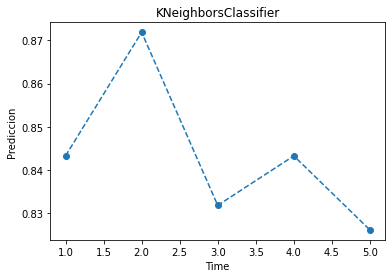

In [218]:
#1 a 5 vecinos
grapKNeighbors(X_data, y_data, 'KNeighborsClassifier', list(range(1,6)))

Training time: 0.04955291748046875s score: 0.8318712273641851
Training time: 0.045058250427246094s score: 0.8432997987927567
Training time: 0.038762807846069336s score: 0.8261971830985916


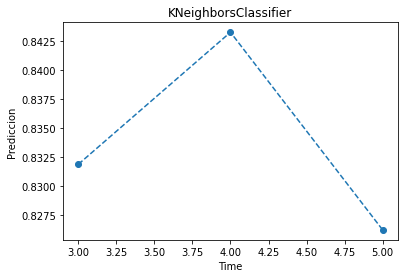

In [217]:
#3,4,5 vecinos
grapKNeighbors(X_data, y_data, 'KNeighborsClassifier', list(range(3,6)))

Training time: 0.040900230407714844s score: 0.8490543259557345


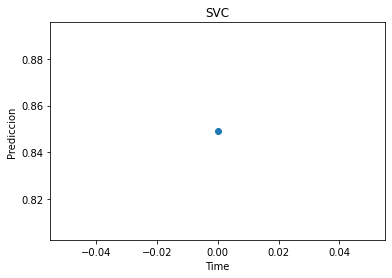

In [223]:
#SVC
grapScore(SVC(gamma='auto', kernel='linear', C=0.025), X_data, y_data, 'SVC')

Training time: 0.04819822311401367s score: 0.8719114688128773


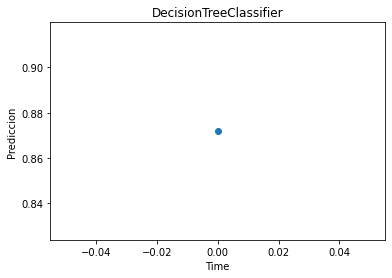

In [224]:
#DecisionTreeClassifier
grapScore(DecisionTreeClassifier(max_depth=5), X_data, y_data, 'DecisionTreeClassifier')

Training time: 0.5782363414764404s score: 0.9147283702213279


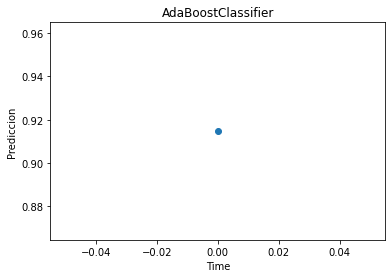

In [226]:
#AdaBoostClassifier
grapScore(AdaBoostClassifier(), X_data, y_data, 'AdaBoostClassifier')

Training time: 0.02794814109802246s score: 0.866036217303823


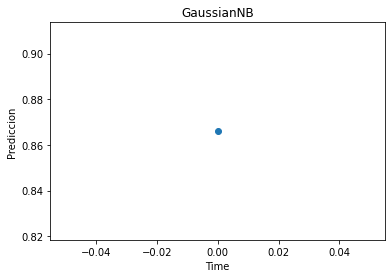

In [228]:
#GaussianNB
grapScore(GaussianNB(), X_data, y_data, 'GaussianNB')